<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Постановка-задачи" data-toc-modified-id="Постановка-задачи-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Постановка задачи</a></span></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-знакомство-с-данными" data-toc-modified-id="Загрузка-и-знакомство-с-данными-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка и знакомство с данными</a></span></li><li><span><a href="#Лемматизация-текста" data-toc-modified-id="Лемматизация-текста-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Лемматизация текста</a></span><ul class="toc-item"><li><span><a href="#Напишем-функцию-clear_text." data-toc-modified-id="Напишем-функцию-clear_text.-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Напишем функцию <strong>clear_text.</strong></a></span></li><li><span><a href="#Напишем-функцию-spacy_nlp." data-toc-modified-id="Напишем-функцию-spacy_nlp.-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Напишем функцию <strong>spacy_nlp.</strong></a></span></li></ul></li><li><span><a href="#Разобьем-данные-на-тренировочную,-валидационную-и-текстовую-выборки" data-toc-modified-id="Разобьем-данные-на-тренировочную,-валидационную-и-текстовую-выборки-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Разобьем данные на тренировочную, валидационную и текстовую выборки</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Подбор-гиперпараметров-для-Логистической-регрессии" data-toc-modified-id="Подбор-гиперпараметров-для-Логистической-регрессии-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Подбор гиперпараметров для Логистической регрессии</a></span></li><li><span><a href="#Подбор-гиперпараметров-для-LightGBM" data-toc-modified-id="Подбор-гиперпараметров-для-LightGBM-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Подбор гиперпараметров для LightGBM</a></span></li><li><span><a href="#Подбор-гиперпараметров-для-SVM" data-toc-modified-id="Подбор-гиперпараметров-для-SVM-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Подбор гиперпараметров для SVM</a></span></li><li><span><a href="#Проверка-моделей-на-валидационной-выборке" data-toc-modified-id="Проверка-моделей-на-валидационной-выборке-3.0.4"><span class="toc-item-num">3.0.4&nbsp;&nbsp;</span>Проверка моделей на валидационной выборке</a></span></li></ul></li></ul></li><li><span><a href="#Проверка-лучшей-модели-на-тестовых-данных" data-toc-modified-id="Проверка-лучшей-модели-на-тестовых-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка лучшей модели на тестовых данных</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Постановка задачи

В нашем распоржении данные интернет магазина "Викишоп", которые содержат описание товаров. Пользователи могут дополнять и редактивровать описания товаров, а также комментировать описания других пользователей.  

Нам необходимо построить модель, которая будет определять токсичность комментария и отправлять его на модерацию.

**Цель задачи:** разработать модель, которая покажет значение метрики качества *F1* не менее 0.75

## Подготовка

In [1]:
#отключим предупреждения
import warnings
warnings.filterwarnings("ignore")

In [2]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from matplotlib.pyplot import figure

from nltk.corpus import stopwords as nltk_stopwords
import nltk
from nltk import pos_tag

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import re

from lightgbm import LGBMClassifier
from sklearn import svm

import spacy
nlp = spacy.load("en_core_web_sm")

In [3]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Мария\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Мария\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Мария\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Загрузка и знакомство с данными

Сохраним данные в датафрейм

In [5]:
data = pd.read_csv('toxic_comments.csv')

Выведем первые 5 строк, чтобы убедиться в корректности прочитанного файла и посмотрим какие есть данные

In [6]:
data.head()

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


Выведем информацию о датафрейме

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


Проверим значеи в столбце "Unnamed: 0". 

In [8]:
data['Unnamed: 0'].head(20)

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
Name: Unnamed: 0, dtype: int64

Видим, что данные повторяют индексы, удалим столбец **Unnamed: 0** из датафрейма

In [9]:
data.drop('Unnamed: 0', axis=1, inplace=True)

Проверим распределение данных по целевому признаку

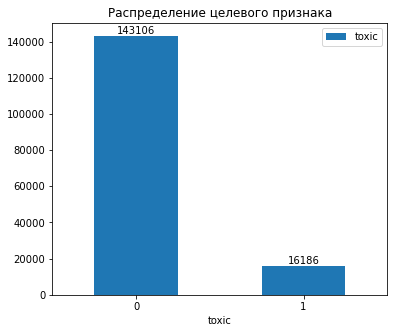

In [10]:
fig, ax = plt.subplots(figsize=(6,5))

ax = pd.DataFrame(data.toxic.value_counts(), columns=['toxic']).plot(kind='bar', ax=ax)
plt.title('Распределение целевого признака')
plt.xlabel('toxic')
plt.xticks(rotation=0)
for i, count in enumerate(data.toxic.value_counts()):
    ax.text(i,count,round(count, 1),  verticalalignment='bottom', horizontalalignment='center')
plt.show()

Видим, что данные не сбалансированные. Доля "токсичных комментариев составляет 10,1%. Учтем это при разбиении на выборки и при создании моделей машинного обучения.

### Лемматизация текста

Создадим корпус лемматизированых текстов. Для этого напишу функции очистки текста от "лишних" символов и функцию лемматизации

#### Напишем функцию **clear_text.**  
На вход она будет получать строку из всех комментариев.  
На выходе получим стороку, в которой останутся только латинские буквы

In [11]:
def clear_text(text):
    list = re.sub(r'[^a-zA-Z]', ' ', text)
    list = list.split()
    return " ".join(list)

#### Напишем функцию **spacy_nlp.**  
На вход она будет получать строку из всех комментариев.  
На выходе получим лемматиированную строку

In [12]:
def spacy_nlp(text):
    doc = nlp(text)
    lemm_text = " ".join([token.lemma_ for token in doc])
    return lemm_text

Применим обе функции к каждому тексту и сохраним результаты в переменной **corpus_lemm.**  
Дополнительно приведем тексты к нижнему регистру.

Применим функцию **clear_text** к столбцу с комментариями

In [13]:
%%time
data['text'] = data['text'].apply(clear_text)

CPU times: total: 13.6 s
Wall time: 13.7 s


Создадим новый столбец **lemm** в датафрейме, который будет содержать лемматизированный текст.  

<b> Предупреждение: ячейка выполнялась 2 часа 37 минут </b>

In [14]:
%%time
data['lemm'] = data['text'].apply(spacy_nlp)

CPU times: total: 2h 39min 58s
Wall time: 2h 40min 7s


CPU times: user 38min 16s, sys: 10.8 s, total: 38min 27s
Wall time: 38min 28s

### Разобьем данные на тренировочную, валидационную и текстовую выборки

Признаками для обучения модели у нас будут закодированные слова в величины TF-IDF, Целевой признак возьмем из столбца **toxic.**

In [15]:
# выделим целевой признак из столбца toxic
target = data.toxic

C помощью метода TfidfVectorizer произведем кодирование слов в велечины TF-IDF

In [16]:
count_tf_idf = TfidfVectorizer(stop_words=stopwords) 

Разделим данные на тренировочную и временную выборки, чтобы далее временну выборку разделить на валидационную и тестовую

In [17]:
features_train, features_temp, target_train, target_temp = train_test_split(data['lemm'],target, test_size=0.4, random_state=12345, stratify=target)

In [18]:
features_valid, features_test, target_valid, target_test = train_test_split(features_temp,target_temp, test_size=0.5, random_state=12345, stratify=target_temp)

Проверим размеры полученных выборок и корректно ли сработала стратификация по целевому признаку

In [19]:
display(f'размер тренировочной выборки {features_train.shape}, количество целевого признака = 1 = {target_train.sum()}, ({round(target_train.sum()/features_train.shape[0],3)})')
display(f'размер валидационной выборки {features_valid.shape}, количество целевого признака = 1 = {target_valid.sum()}, ({round(target_valid.sum()/features_valid.shape[0],3)})')
display(f'размер тестовой выборки {features_test.shape}, количество целевого признака = 1 = {target_test.sum()}, ({round(target_test.sum()/features_test.shape[0],3)})')

'размер тренировочной выборки (95575,), количество целевого признака = 1 = 9712, (0.102)'

'размер валидационной выборки (31858,), количество целевого признака = 1 = 3237, (0.102)'

'размер тестовой выборки (31859,), количество целевого признака = 1 = 3237, (0.102)'

Обучим **TfidfVectorizer** на тренировочной выборке и сразу применим трансформ для нее

In [20]:
tf_idf_train = count_tf_idf.fit_transform(features_train.values)

Применим метод трансформ для валидационной и тестовых выборок

In [21]:
tf_idf_valid = count_tf_idf.transform(features_valid.values)

In [22]:
%%time
tf_idf_test = count_tf_idf.transform(features_test.values)

CPU times: total: 4.61 s
Wall time: 4.59 s


Проверим размеры полученных матриц

In [23]:
tf_idf_train.shape

(95575, 116207)

In [24]:
tf_idf_valid.shape

(31858, 116207)

In [25]:
tf_idf_test.shape

(31859, 116207)

Из полученных размеров видно, что кодирование признаков, на которых будет обучаться модель прошло корректно

## Обучение

Будем рассматривать работу трех моделей машинного обучения:
- Логистическую регрессию;
- LightGBM;
- SVM.

Объявим словари с указанием гиперпараметров, которые будем перебирать используя алгоритм GridSearchCV

In [26]:
# для lgbm
params_log = { 'penalty': ['l1', 'l2'],
                'solver' : ['newton-cg', 'liblinear'],
                'max_iter' : [1, 10], 
                'C': np.logspace(-4, 4, 10)}

In [36]:
#для lgbm
params_lgbm = {'n_estimators':[100, 300],
              'max_depth': [10],
             'learning_rate': [0.5, 0.8],
             'num_iterations' : [10, 40]
              }

#### Подбор гиперпараметров для Логистической регрессии

In [28]:
# Объявим модель логистической регрессии
model_log = LogisticRegression(n_jobs = -1, class_weight='balanced')

In [29]:
# Создадим 
grid_log = GridSearchCV(estimator=model_log, param_grid=params_log, cv=5, scoring='f1')

In [30]:
%%time
grid_log.fit(tf_idf_train, target_train)

CPU times: total: 37min 12s
Wall time: 19min 39s


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced', n_jobs=-1),
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'max_iter': [1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'liblinear']},
             scoring='f1')

In [31]:
grid_log.best_params_

{'C': 2.782559402207126,
 'max_iter': 10,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [32]:
# сохраним модель Логистической регрессии с наилучшими гиперпараметрами для дальнейшей проверки на кроссвалидации
model_log = grid_log.best_estimator_
model_log

LogisticRegression(C=2.782559402207126, class_weight='balanced', max_iter=10,
                   n_jobs=-1, penalty='l1', solver='liblinear')

#### Подбор гиперпараметров для LightGBM

In [33]:
# Объявим модель LightGBM
model_lgbm = LGBMClassifier(n_jobs=-1)
model_lgbm

LGBMClassifier()

In [37]:
grid_lgbm = GridSearchCV(estimator=model_lgbm, param_grid=params_lgbm, cv=5, scoring='f1')

In [38]:
%%time
grid_lgbm.fit(tf_idf_train, target_train)

CPU times: total: 49min 7s
Wall time: 14min 44s


GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.5, 0.8], 'max_depth': [10],
                         'n_estimators': [100, 300],
                         'num_iterations': [10, 40]},
             scoring='f1')

In [39]:
# выведем наилучшие параметры модели LightGBM
grid_lgbm.best_params_

{'learning_rate': 0.5,
 'max_depth': 10,
 'n_estimators': 100,
 'num_iterations': 40}

In [40]:
# сохраним модель LightGBM с наилучшими гиперпараметрами для дальнейшей проверки на кроссвалидации
model_lgbm = grid_lgbm.best_estimator_

#### Подбор гиперпараметров для SVM

объевим модель. Гиперпараметры подбирать не стал, т.к. пытался сделать это, но гридсеч не выполнился даже за 12 часов

In [41]:
# Объявим модель SVM
model_svm = svm.SVC(random_state=12345)

#### Проверка моделей на валидационной выборке

Создадим словарь с обученными моделями

In [42]:
dict = {'LightGBM' : model_lgbm ,
        'linear' : model_log,
        'svm' : model_svm
       }

Создадим датафрейм, в который в дальнейшем сохраним результаты проверки работы моделей на валидационной выборке

In [43]:
results = pd.DataFrame(index = dict.keys(), columns=['model', 'F1', 'time_fit'])
results

,model,F1,time_fit
LightGBM,NaN,NaN,NaN
linear,NaN,NaN,NaN
svm,NaN,NaN,NaN


Сделаем цикл, на каждой итерации которого каждая модель обучится на тренировочных данных и сделает предсказание на валидационной выборке.  
После этого посчитаем метрику **F1** и время обучения модели.
Сохраним все данные в таблицу **results**

In [44]:
%%time
for index, model in dict.items():
    pred = []
    f1 = 0
    results.loc[index]['model'] = index
    print(model)
    time_start = time.time() # фиксируем время начала обучения
    model.fit(tf_idf_train, target_train)
    pred = model.predict(tf_idf_valid)
    f1 = f1_score(target_valid, pred)    
    results.loc[index]['time_fit'] = round((time.time() - time_start),2)
    results.loc[index]['F1'] = round(abs(f1),3)
    print(results.loc[index]['time_fit'])
    print('f1 -', {results.loc[index]['F1']})

LGBMClassifier(learning_rate=0.5, max_depth=10, num_iterations=40)
37.83
f1 - {0.752}
LogisticRegression(C=2.782559402207126, class_weight='balanced', max_iter=10,
                   n_jobs=-1, penalty='l1', solver='liblinear')
6.03
f1 - {0.77}
SVC(random_state=12345)
3312.75
f1 - {0.752}
CPU times: total: 57min 10s
Wall time: 55min 56s


Выведем полученые результаты на экран, отсортируем модели по возрастанию метрики **F1.**

In [45]:
results.sort_values(by='F1', ascending=True, inplace=True)

Отрисуем данную таблицу

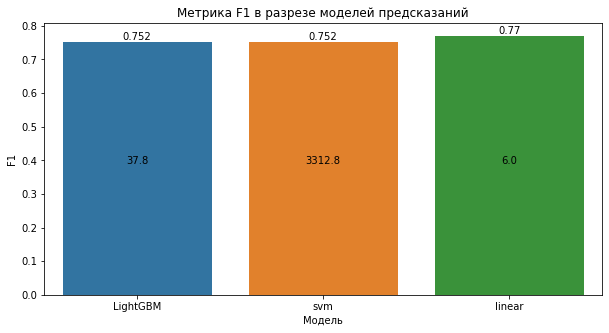

In [46]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(data=results, x='model', y='F1')
for i, metrics in enumerate(results.F1):
    ax.text(i,metrics,round(metrics, 3),  verticalalignment='bottom', horizontalalignment='center')
for i, time in enumerate(results.time_fit):
    ax.text(i,metrics/2,round(time, 1),  verticalalignment='bottom', horizontalalignment='center')    
plt.title('Метрика F1 в разрезе моделей предсказаний')
plt.xlabel('Модель')
plt.show()

**Вывод:**  
По результатам работы моделей на валидационной выборке видим, что наилучшую метрику F1 показала модель **Логистическая регрессия.**
В результате для проверки на тестовых данных будем использовать ее.

## Проверка лучшей модели на тестовых данных

In [47]:
pred_test = model_log.predict(tf_idf_test)

In [48]:
f1_test = f1_score(target_test,pred_test)
f'Результат метрики F1 наилучшей модели равен {round(f1_test, 3)}'

'Результат метрики F1 наилучшей модели равен 0.756'

## Выводы

В нашем распоржении были данные интернет магазина "Викишоп", которые содержат описание товаров.  
Пользователи могут дополнять и редактивровать описания товаров, а также комментировать описания других пользователей.

Нам было необходимо построить модель, которая будет определять токсичность комментария и отправлять его на модерацию.

Цель задачи: разработать модель, которая покажет значение метрики качества F1 не менее 0.75

В самом начале выполнения проекта были загружены имеющиеся данные. 
Данные содержали столбец с текстами комментариев, признаком токсичен комментарий или нет и "лишний" столбец, дублирующий индексы.  

Столбец с текстами комментариев был обработан:
- текст был очищен от "лишних" символов, оставили только латинские буквы. Привели текст в нижний регистр.
- текст был лемматизирован используя SPACY.

Далее используя алгоритм подбора гиперпараметров **GridSearchCV** мы подобрали гиперпараметры для двух моделей машинного обучения:
- Логистическую регрессию;
- LightGBM;

Также обучили модель SVM на стандартных гиперпараметрах.

В результате проверки работы модели на валидационной выборке лучшие результаты метрики **F1** показала модель **Логистическая регрессия.**  

При итоговой проверке работы модели на тестовой выборке было получено значение метрики **F1 = 0,756 **.

Целевая задача проекта выполнена.